In [ ]:
### Michelle Kouba
### News classifier


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
os.chdir('/content/drive/My Drive/GitHub/dsc650/dsc650/assignments/assignment05')
!pwd

Mounted at /content/drive
/content/drive/My Drive/GitHub/dsc650/dsc650/assignments/assignment05


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras import metrics
from keras import models
from keras import layers
from keras import losses
from keras import optimizers
from keras.datasets import reuters

## Keras Sequential News Classifier

In [ ]:
# Building the neural network
# Defining the model (Keras Sequential)
model = models.Sequential()
# Add three layers to the model
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [ ]:
# Compiling the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Setting aside a validation set of data (x) and labels (y) (split from the training set)
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
# Training the model for 20 epochs in batches of 512 while monitoring the loss and accuracy of the validation set as well.
# Fitting the model and returning a dictionary (history) that contains the data of what happened during training.
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 44ms/step - loss: 2.7271 - accuracy: 0.5367 - val_loss: 1.8239 - val_accuracy: 0.6470
Epoch 2/20
16/16 [==============================] - 1s 33ms/step - loss: 1.5094 - accuracy: 0.6962 - val_loss: 1.3575 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 0s 31ms/step - loss: 1.1530 - accuracy: 0.7494 - val_loss: 1.1739 - val_accuracy: 0.7420
Epoch 4/20
16/16 [==============================] - 1s 33ms/step - loss: 0.9428 - accuracy: 0.7968 - val_loss: 1.0943 - val_accuracy: 0.7590
Epoch 5/20
16/16 [==============================] - 1s 32ms/step - loss: 0.7834 - accuracy: 0.8306 - val_loss: 1.0097 - val_accuracy: 0.7830
Epoch 6/20
16/16 [==============================] - 1s 32ms/step - loss: 0.6493 - accuracy: 0.8599 - val_loss: 0.9464 - val_accuracy: 0.8130
Epoch 7/20
16/16 [==============================] - 0s 31ms/step - loss: 0.5412 - accuracy: 0.8855 - val_loss: 0.9135 - val_accuracy: 0.8010
Epoch 8/20
16

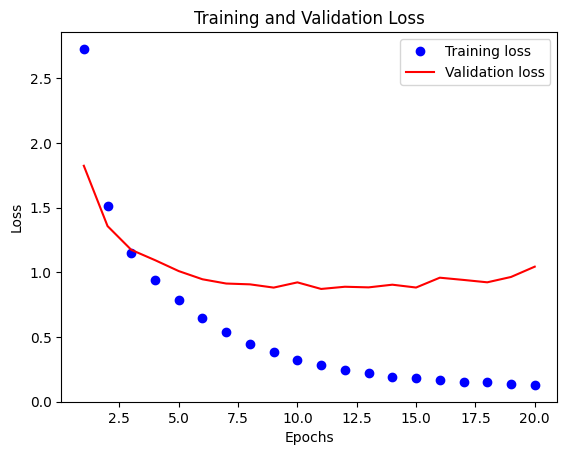

In [ ]:
# Retrieving the training and validation losses as well as the training and validation accuracy from the history dictionary
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Getting the number of epochs needed
epochs = range(1, len(loss_values) + 1)

# Plotting the training and validation loss values
# 'bo' is for blue dot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
# 'r' is for red line
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

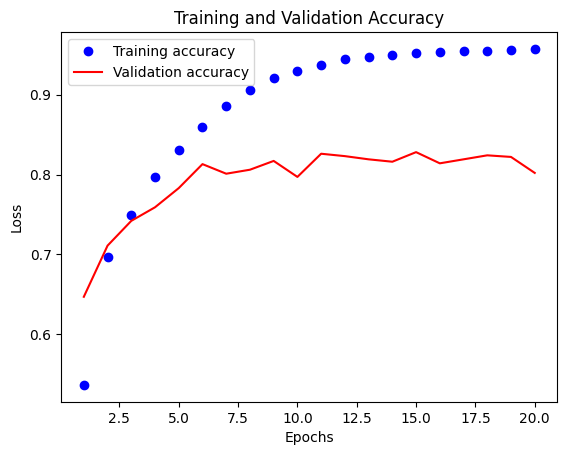

In [ ]:
# Plotting the training and validation accuracy
#Clearing the plot values
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
# 'bo' is for blue dot
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
# 'r' is for red line
plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Redefining the model to 9 epochs based on the graphs above so as not to overfit the model.
# Keras sequential model
model = models.Sequential()
# Adding layers
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Compiling model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Retraining model with 9 epochs
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# evaluate model performance on test data
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 1s 41ms/step - loss: 2.9132 - accuracy: 0.4831 - val_loss: 1.9611 - val_accuracy: 0.6270
Epoch 2/9
16/16 [==============================] - 1s 32ms/step - loss: 1.6279 - accuracy: 0.6833 - val_loss: 1.4229 - val_accuracy: 0.7060
Epoch 3/9
16/16 [==============================] - 0s 31ms/step - loss: 1.2177 - accuracy: 0.7439 - val_loss: 1.2238 - val_accuracy: 0.7300
Epoch 4/9
16/16 [==============================] - 1s 31ms/step - loss: 1.0015 - accuracy: 0.7879 - val_loss: 1.1239 - val_accuracy: 0.7470
Epoch 5/9
16/16 [==============================] - 0s 31ms/step - loss: 0.8383 - accuracy: 0.8196 - val_loss: 1.0232 - val_accuracy: 0.7770
Epoch 6/9
16/16 [==============================] - 0s 30ms/step - loss: 0.7032 - accuracy: 0.8493 - val_loss: 0.9815 - val_accuracy: 0.7810
Epoch 7/9
16/16 [==============================] - 0s 31ms/step - loss: 0.5899 - accuracy: 0.8732 - val_loss: 0.9367 - val_accuracy: 0.7970
Epoch 8/9
16/16 [===

In [ ]:
# Using the trained model to make predictions on the testing data
predictions = model.predict(x_test)


71/71 [==============================] - 0s 2ms/step


In [ ]:
# Summing the coefficients in the first vector
np.sum(predictions[0])

1.0